# Time Series - Moving Average Exercise 2

### <font color='red'>1) Loading the data and calling required libs
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,auc

from sklearn import tree
import graphviz
from graphviz import Source
from dtreeviz.trees import *

from sklearn.model_selection import cross_val_score

from IPython.display import display, Markdown
import warnings
warnings.filterwarnings("ignore")



%matplotlib inline

In [2]:
data = pd.read_csv('AMZN.csv')
data.head(5)

,Date,Open,High,Low,ClosingPrice,Adj Close,Volume
0,18/10/2018,1821.489990,1830.150024,1767.869995,1770.719971,1770.719971,5874000
1,19/10/2018,1785.160034,1809.099976,1753.000000,1764.030029,1764.030029,5907200
2,22/10/2018,1784.000000,1809.500000,1756.000000,1789.300049,1789.300049,4500000
3,23/10/2018,1742.239990,1776.339966,1714.000000,1768.699951,1768.699951,6723900
4,24/10/2018,1773.699951,1777.709961,1656.560059,1664.199951,1664.199951,6928400


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          251 non-null    object 
 1   Open          251 non-null    float64
 2   High          251 non-null    float64
 3   Low           251 non-null    float64
 4   ClosingPrice  251 non-null    float64
 5   Adj Close     251 non-null    float64
 6   Volume        251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [4]:
# as the date column is an object type, it needs to be converted to DataTime type
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          251 non-null    datetime64[ns]
 1   Open          251 non-null    float64       
 2   High          251 non-null    float64       
 3   Low           251 non-null    float64       
 4   ClosingPrice  251 non-null    float64       
 5   Adj Close     251 non-null    float64       
 6   Volume        251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [6]:
data.sample(5)

,Date,Open,High,Low,ClosingPrice,Adj Close,Volume
234,2019-09-25,1747.359985,1773.000000,1723.000000,1768.329956,1768.329956,3493200
159,2019-10-06,1822.000000,1884.869995,1818.000000,1860.630005,1860.630005,5371000
115,2019-05-04,1829.000000,1838.579956,1825.189941,1837.280029,1837.280029,3640500
129,2019-04-26,1929.000000,1951.000000,1898.000000,1950.630005,1950.630005,8432600
42,2018-12-19,1543.050049,1584.530029,1483.180054,1495.079956,1495.079956,8792200


### <font color='red'>2) Feature engineering
 

In [10]:
data['Months'] = data['Date'].dt.month
data['Days']=data['Date'].dt.day
data['Year'] = data['Date'].dt.year

In [12]:
data.head(5)

,Date,Open,High,Low,ClosingPrice,Adj Close,Volume,Months,Days,Year
0,2018-10-18,1821.489990,1830.150024,1767.869995,1770.719971,1770.719971,5874000,10,18,2018
1,2018-10-19,1785.160034,1809.099976,1753.000000,1764.030029,1764.030029,5907200,10,19,2018
2,2018-10-22,1784.000000,1809.500000,1756.000000,1789.300049,1789.300049,4500000,10,22,2018
3,2018-10-23,1742.239990,1776.339966,1714.000000,1768.699951,1768.699951,6723900,10,23,2018
4,2018-10-24,1773.699951,1777.709961,1656.560059,1664.199951,1664.199951,6928400,10,24,2018


### <font color='red'>3) Visualization to understand the data better
 

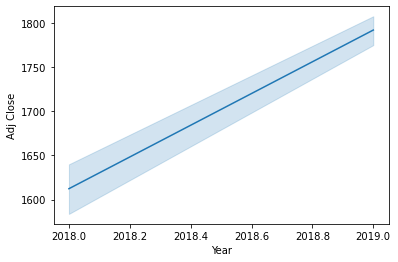

In [51]:
sns.lineplot(x=data['Year'],y=data['Adj Close'])

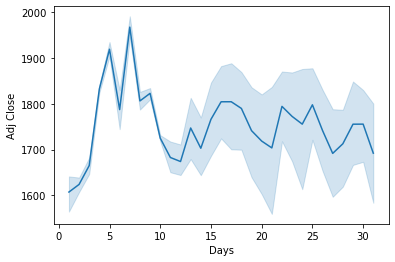

In [25]:
sns.lineplot(x=data['Days'],y=data['Adj Close'])

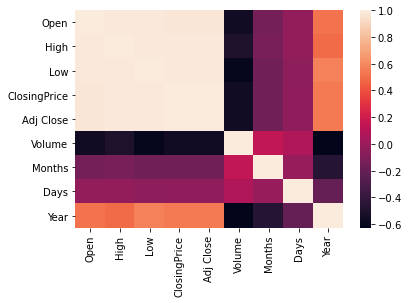

In [18]:
sns.heatmap(data.corr())

data.describe()

In [52]:
data.describe()

,Open,High,Low,ClosingPrice,Adj Close,Volume,Months,Days,Year
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000,251.000000,251.000000
mean,1757.141947,1774.890120,1736.064342,1756.146497,1756.146497,4.798385e+06,6.605578,15.697211,2018.800797
std,132.529924,126.085532,137.526137,132.291032,132.291032,2.313652e+06,3.440902,8.854149,0.400199
min,1346.000000,1396.030029,1307.000000,1343.959961,1343.959961,1.690300e+06,1.000000,1.000000,2018.000000
25%,1656.159973,1675.885010,1628.010010,1656.399964,1656.399964,3.051650e+06,4.000000,8.000000,2019.000000
50%,1770.219971,1788.000000,1748.780029,1768.699951,1768.699951,4.208900e+06,7.000000,16.000000,2019.000000
75%,1845.279968,1853.375000,1834.725036,1848.594970,1848.594970,5.920250e+06,10.000000,23.000000,2019.000000
max,2025.619995,2035.800049,2003.869995,2020.989990,2020.989990,1.496380e+07,12.000000,31.000000,2019.000000


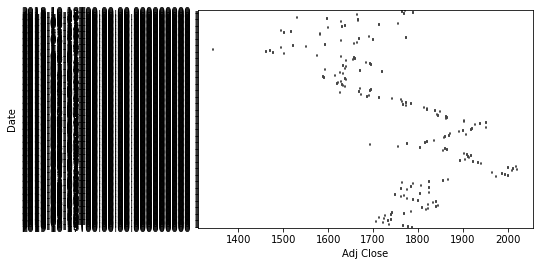

In [57]:
sns.boxplot(x=data["Adj Close"], y=data["Date"], data=pd.melt(data))


### <font color='blue'> Observations:
* the columns 'open', 'high', 'low', 'closing price', 'adj close' are highly correlated. so we only need to keep one
 

### <font color='red'>4) Answering the questions
 

In [33]:
NUMBER_OF_DAYS = 200  # set the recent period
data_200_days = data['Adj Close'][-NUMBER_OF_DAYS:]

##### <font color='blue'>1) What is the average stock price based on the past 200 days?

In [34]:
data_200_days.mean()

1793.1991015499996

##### <font color='blue'>2) Plot the graph of the historical stock price, 50 days moving average and 200 days moving average

In [39]:
rolling_mean_50 = data['Adj Close'].rolling(window=50).mean().shift(1)  

rolling_mean_200 = data['Adj Close'].rolling(window=200).mean().shift(1)  
 # moving average of past 12 months, shift one row

print(data.head())
print("--  rolling mean 3")
print(rolling_mean_50.head())
print("--  rolling mean 12")
print(rolling_mean_200.head())

        Date         Open         High          Low  ClosingPrice  \
0 2018-10-18  1821.489990  1830.150024  1767.869995   1770.719971   
1 2018-10-19  1785.160034  1809.099976  1753.000000   1764.030029   
2 2018-10-22  1784.000000  1809.500000  1756.000000   1789.300049   
3 2018-10-23  1742.239990  1776.339966  1714.000000   1768.699951   
4 2018-10-24  1773.699951  1777.709961  1656.560059   1664.199951   

     Adj Close   Volume  Months  Days  Year  
0  1770.719971  5874000      10    18  2018  
1  1764.030029  5907200      10    19  2018  
2  1789.300049  4500000      10    22  2018  
3  1768.699951  6723900      10    23  2018  
4  1664.199951  6928400      10    24  2018  
--  rolling mean 3
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Adj Close, dtype: float64
--  rolling mean 12
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Adj Close, dtype: float64


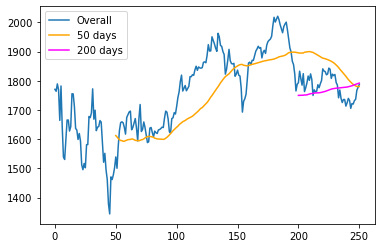

In [44]:
plt.plot(data.index, data['Adj Close'], label='Overall')
plt.plot(data.index, rolling_mean_50, label='50 days', color='orange')
plt.plot(data.index, rolling_mean_200, label='200 days', color='magenta')
plt.legend(loc='upper left')
plt.show()

In [49]:
rolling_mean_50

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
          ...     
246    1784.700999
247    1782.233000
248    1780.496802
249    1780.541802
250    1780.333804
Name: Adj Close, Length: 251, dtype: float64

In [46]:
data

,Date,Open,High,Low,ClosingPrice,Adj Close,Volume,Months,Days,Year
0,2018-10-18,1821.489990,1830.150024,1767.869995,1770.719971,1770.719971,5874000,10,18,2018
1,2018-10-19,1785.160034,1809.099976,1753.000000,1764.030029,1764.030029,5907200,10,19,2018
2,2018-10-22,1784.000000,1809.500000,1756.000000,1789.300049,1789.300049,4500000,10,22,2018
3,2018-10-23,1742.239990,1776.339966,1714.000000,1768.699951,1768.699951,6723900,10,23,2018
4,2018-10-24,1773.699951,1777.709961,1656.560059,1664.199951,1664.199951,6928400,10,24,2018
...,...,...,...,...,...,...,...,...,...,...
246,2019-11-10,1742.920044,1745.449951,1729.859985,1731.920044,1731.920044,3255000,11,10,2019
247,2019-10-14,1728.910034,1741.890015,1722.000000,1736.430054,1736.430054,1910200,10,14,2019
248,2019-10-15,1742.140015,1776.449951,1740.619995,1767.380005,1767.380005,3111700,10,15,2019
249,2019-10-16,1773.329956,1786.239990,1770.520020,1777.430054,1777.430054,2763400,10,16,2019
